In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import *
from IPython.html.widgets import interact
from scipy.interpolate import griddata
import numpy as np

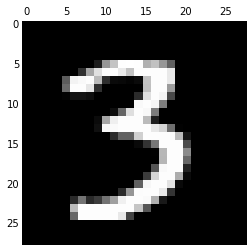

In [15]:
import gzip
import cPickle
# Load the dataset
f = gzip.open('mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = cPickle.load(f)
#file_content = f.read()
f.close()
#len(file_content)
#training_data[0][50]
x = np.reshape(training_data[0][10000],(28,28))
plt.matshow(x, cmap=cm.gray)

In [19]:
def crop(x):
    n = -1
    h = 27
    x = np.matrix(x)
    while n < h:
        n = n + 1
        if np.matrix.sum(x[n]) + np.matrix.sum(x[:,n]) < 0.2:
            x = np.delete(x, n, 0)
            x = np.delete(x, n, 1)
            h = h - 1
            n = n - 1
    return x
    

In [18]:
def interpol(q):
    
    m = len(q)
    q = np.asarray(q)

    X,Y = np.meshgrid(range(m),range(m))

    X = np.reshape(X, m*m)
    Y = np.reshape(Y, m*m)
    q = np.reshape(q, m*m)

    xnew = np.linspace(0,m-1,12)
    ynew = np.linspace(0,m-1,12)
    Xnew,Ynew = np.meshgrid(xnew,ynew)

    Fnew = griddata((X, Y), q, (Xnew, Ynew), method='cubic')

    return Fnew

In [20]:
p = np.ones((10000,12,12))
n = 0
while n < 10000:
    
    x = np.reshape(training_data[0][n],(28,28))
    x = crop(x)
    x = interpol(x)
    p[n] = x
    n = n + 1

In [21]:
f = open('x_files', 'w')
np.save(f, p)
f.close()

In [22]:
p = np.ones((10000))
n = 0
while n < 10000:
    x = training_data[1][n]
    p[n] = x
    n = n + 1

In [23]:
f = open('y_files', 'w')
np.save(f, p)
f.close()

In [2]:
# f = open('y_files', 'r')
# r = np.load(f)
# f.close()

In [4]:
# plt.matshow(t[11], cmap=cm.gray)
# print(r[31])

8.0


In [13]:
# y = interpol(x)
# plt.matshow(y, cmap=cm.gray)

TypeError: object of type 'numpy.int64' has no len()